In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [165]:
df = pd.read_csv("data/finalTrain.csv")

In [166]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [167]:
df.shape

(45584, 20)

In [168]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [169]:
df.isnull().mean()*100

ID                             0.000000
Delivery_person_ID             0.000000
Delivery_person_Age            4.067217
Delivery_person_Ratings        4.185679
Restaurant_latitude            0.000000
Restaurant_longitude           0.000000
Delivery_location_latitude     0.000000
Delivery_location_longitude    0.000000
Order_Date                     0.000000
Time_Orderd                    3.797385
Time_Order_picked              0.000000
Weather_conditions             1.351351
Road_traffic_density           1.318445
Vehicle_condition              0.000000
Type_of_order                  0.000000
Type_of_vehicle                0.000000
multiple_deliveries            2.178396
Festival                       0.500176
City                           2.632503
Time_taken (min)               0.000000
dtype: float64

Colums which has less than 1.5% of missing NA values:

As per EDA, dropping the rows from the column: 

In [170]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.015 and df[var].isnull().mean() > 0]
cols

['Weather_conditions', 'Road_traffic_density', 'Festival']

In [171]:
df = df.dropna(subset=cols)

In [172]:
df.shape

(44743, 20)

In [173]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1322
Delivery_person_Ratings        1375
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1109
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             969
Festival                          0
City                           1160
Time_taken (min)                  0
dtype: int64

In [174]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43421.000000,43368.000000,44743.000000,44743.000000,44743.000000,44743.000000,44743.000000,43774.000000,44743.000000
mean,29.576196,4.634678,17.140683,70.601956,17.469516,70.829817,0.999262,0.746630,26.366515
std,5.761571,0.314340,7.938875,21.680522,7.340693,21.138683,0.816893,0.571901,9.344705
min,20.000000,2.500000,-30.905562,-88.352885,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.988453,73.279083,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.898497,18.634382,76.002471,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785207,78.105733,2.000000,1.000000,32.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,2.000000,3.000000,54.000000


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44743 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           44743 non-null  object 
 1   Delivery_person_ID           44743 non-null  object 
 2   Delivery_person_Age          43421 non-null  float64
 3   Delivery_person_Ratings      43368 non-null  float64
 4   Restaurant_latitude          44743 non-null  float64
 5   Restaurant_longitude         44743 non-null  float64
 6   Delivery_location_latitude   44743 non-null  float64
 7   Delivery_location_longitude  44743 non-null  float64
 8   Order_Date                   44743 non-null  object 
 9   Time_Orderd                  43634 non-null  object 
 10  Time_Order_picked            44743 non-null  object 
 11  Weather_conditions           44743 non-null  object 
 12  Road_traffic_density         44743 non-null  object 
 13  Vehicle_condition    

In [176]:

df.dropna(how = 'all').shape

(44743, 20)

It is to be noted that the latitude and longitude of India ranges from :-
Latitude: 8 to 37
Longitude: 68 to 97
So it is not possible to have a negative value in the locations columns
Hence we convert all the negative values to positive values

In [177]:
## Converted negative values to postive

df[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']] = df[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude', 'Delivery_location_longitude']].applymap(abs)
                     

In [178]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43421.000000,43368.000000,44743.000000,44743.000000,44743.000000,44743.000000,44743.000000,43774.000000,44743.000000
mean,29.576196,4.634678,17.405823,70.766125,17.469516,70.829817,0.999262,0.746630,26.366515
std,5.761571,0.314340,7.339336,21.138503,7.340693,21.138683,0.816893,0.571901,9.344705
min,20.000000,2.500000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.934179,73.170283,12.988453,73.279083,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.554382,75.898497,18.634382,76.002471,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.732225,78.046106,22.785207,78.105733,2.000000,1.000000,32.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,2.000000,3.000000,54.000000


In [179]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


Lets check the values which are out of range for Delivery_location_latitude and Delivery_location_longitude

In [180]:
df[df['Delivery_location_latitude'] <= 8 ].shape

(3580, 20)

In [181]:
df[df['Delivery_location_longitude'] <= 8 ].shape


(3580, 20)

In [182]:
df[df['Restaurant_longitude'] <= 8].shape

(3580, 20)

Convert all the values which are out of range to 0

In [183]:
df.loc[df['Restaurant_latitude'] <= 8, 'Restaurant_latitude'] = 0

In [184]:
df.loc[df['Restaurant_longitude'] <= 8, 'Restaurant_longitude'] = 0

In [185]:
df.loc[df['Delivery_location_latitude'] <= 8, 'Delivery_location_latitude'] = 0

In [186]:
df.loc[df['Delivery_location_longitude'] <= 8, 'Delivery_location_longitude'] = 0

In [187]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43421.000000,43368.000000,44743.000000,44743.000000,44743.000000,44743.000000,44743.000000,43774.000000,44743.000000
mean,29.576196,4.634678,17.405823,70.766125,17.464461,70.824762,0.999262,0.746630,26.366515
std,5.761571,0.314340,7.339336,21.138503,7.352682,21.155602,0.816893,0.571901,9.344705
min,20.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.934179,73.170283,12.988453,73.279083,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.554382,75.898497,18.634382,76.002471,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.732225,78.046106,22.785207,78.105733,2.000000,1.000000,32.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,2.000000,3.000000,54.000000


Important thing is to note that the delivery time is directly proportional to the distance between restaurant and delivery address. We do not have any distance column, instead we have restaurnat latitude,longitude and delivery address latitude,longitude. We can calculate the distance using that

We use Haversine formula to calculate distance return it in kilometers

In [188]:
import math

def calculate_distance(lat1, lon1, lat2, lon2):
    radius = 6371  # Radius of the earth in km
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon / 2) * math.sin(dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    dist = radius * c
    return dist

Apply Calculate_distance function to create new column Distance:

In [189]:
df['distance_in_km'] = df.apply(lambda row: calculate_distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)


In [191]:
df['distance_in_km'].unique()

array([10.28058206,  6.24231868, 13.78786024, ..., 11.71930094,
       20.07128962, 19.83960676])

Now we will convert the rows of distance column which are zero to NaN for later imputation

In [192]:
df.loc[df['distance_in_km'] == 0, 'distance_in_km'] = None

In [193]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1322
Delivery_person_Ratings        1375
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1109
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             969
Festival                          0
City                           1160
Time_taken (min)                  0
distance_in_km                 3580
dtype: int64

In [194]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618


In [195]:
file_path = "data/final_converted.csv"

In [196]:
df.to_csv(file_path,index=False)

In [197]:
df = df.drop(labels=["ID","Delivery_person_ID","Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude","Order_Date","Time_Orderd","Time_Order_picked","Type_of_order"],axis=1)

In [198]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance_in_km
0,36.0,4.2,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,46,10.280582
1,21.0,4.7,Stormy,High,1,motorcycle,1.0,No,Metropolitian,23,6.242319
2,23.0,4.7,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,21,13.787860
3,34.0,4.3,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,20,2.930258
4,24.0,4.7,Fog,Jam,1,scooter,1.0,No,Metropolitian,41,19.396618


In [199]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),distance_in_km
count,43421.000000,43368.000000,44743.000000,43774.000000,44743.000000,41163.000000
mean,29.576196,4.634678,0.999262,0.746630,26.366515,9.730844
std,5.761571,0.314340,0.816893,0.571901,9.344705,5.600866
min,20.000000,2.500000,0.000000,0.000000,10.000000,1.465067
25%,25.000000,4.500000,0.000000,0.000000,19.000000,4.657673
50%,30.000000,4.700000,1.000000,1.000000,26.000000,9.193094
75%,35.000000,4.900000,2.000000,1.000000,32.000000,13.680987
max,39.000000,5.000000,2.000000,3.000000,54.000000,20.969489


In [200]:
## Independent and dependent features:

X =df.drop(labels=['Time_taken (min)'],axis=1)
Y = df[["Time_taken (min)"]]

In [201]:
Y

,Time_taken (min)
0,46
1,23
2,21
3,20
4,41
...,...
45579,32
45580,36
45581,16
45582,26


In [202]:
X

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,distance_in_km
0,36.0,4.2,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,10.280582
1,21.0,4.7,Stormy,High,1,motorcycle,1.0,No,Metropolitian,6.242319
2,23.0,4.7,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,13.787860
3,34.0,4.3,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,2.930258
4,24.0,4.7,Fog,Jam,1,scooter,1.0,No,Metropolitian,19.396618
...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,Windy,High,1,motorcycle,0.0,No,Metropolitian,1.489846
45580,21.0,4.6,Windy,Jam,0,motorcycle,1.0,No,Metropolitian,NaN
45581,30.0,4.9,Cloudy,Low,1,scooter,0.0,No,Metropolitian,4.657195
45582,20.0,4.7,Cloudy,High,0,motorcycle,1.0,No,Metropolitian,6.232393


In [203]:
categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(exclude = "object").columns

In [204]:
categorical_cols

Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_vehicle',
       'Festival', 'City'],
      dtype='object')

In [205]:
numerical_cols

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'distance_in_km'],
      dtype='object')

In [206]:
from sklearn.impute import SimpleImputer #handling missing values
from sklearn.preprocessing import StandardScaler #Handling feaetrure scaling
from sklearn.preprocessing import OrdinalEncoder #Ordinal Encoding
##Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

<Axes: xlabel='Delivery_person_Age', ylabel='Count'>

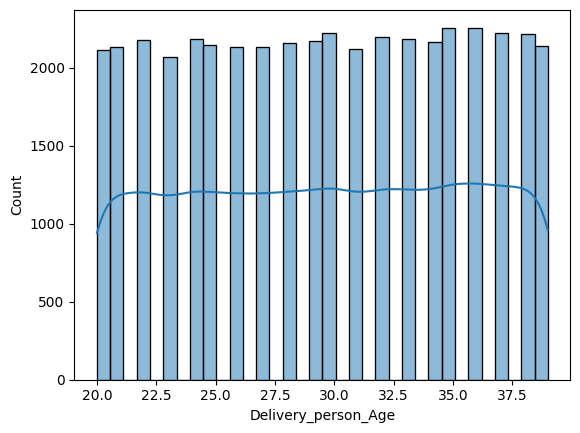

In [71]:
sns.histplot(df["Delivery_person_Age"],kde=True)

<Axes: xlabel='Delivery_person_Ratings', ylabel='Count'>

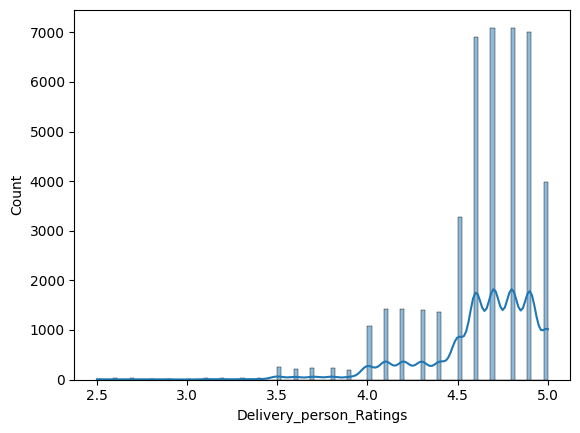

In [72]:
sns.histplot(df["Delivery_person_Ratings"],kde=True)

<Axes: xlabel='distance_in_km', ylabel='Count'>

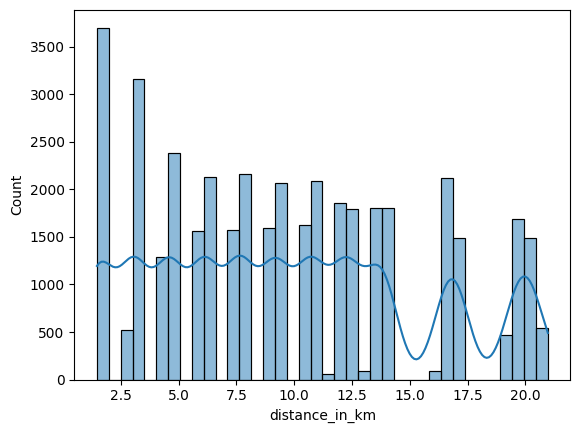

In [73]:
sns.histplot(df["distance_in_km"],kde=True)

In [207]:
## Column Delivery_person_Ratings is left skewed. It would be better use imputation startergy as median as median is much more robust
## compared to mean.

df["Delivery_person_Ratings"].median()

4.7

In [208]:
df.isnull().sum()

Delivery_person_Age        1322
Delivery_person_Ratings    1375
Weather_conditions            0
Road_traffic_density          0
Vehicle_condition             0
Type_of_vehicle               0
multiple_deliveries         969
Festival                      0
City                       1160
Time_taken (min)              0
distance_in_km             3580
dtype: int64

In [209]:
df["City"].value_counts()

City
Metropolitian    33501
Urban             9919
Semi-Urban         163
Name: count, dtype: int64

In [210]:
## City column can be imputed with startergy as mode

In [211]:
df["multiple_deliveries"].value_counts()

multiple_deliveries
1.0    27709
0.0    13755
2.0     1956
3.0      354
Name: count, dtype: int64

<Axes: xlabel='multiple_deliveries', ylabel='Count'>

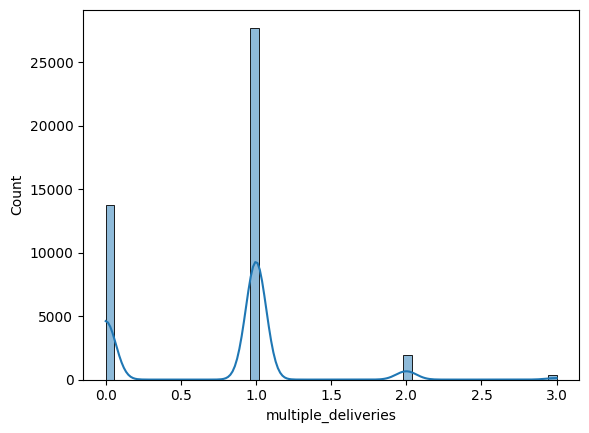

In [212]:
sns.histplot(df["multiple_deliveries"],kde=True)

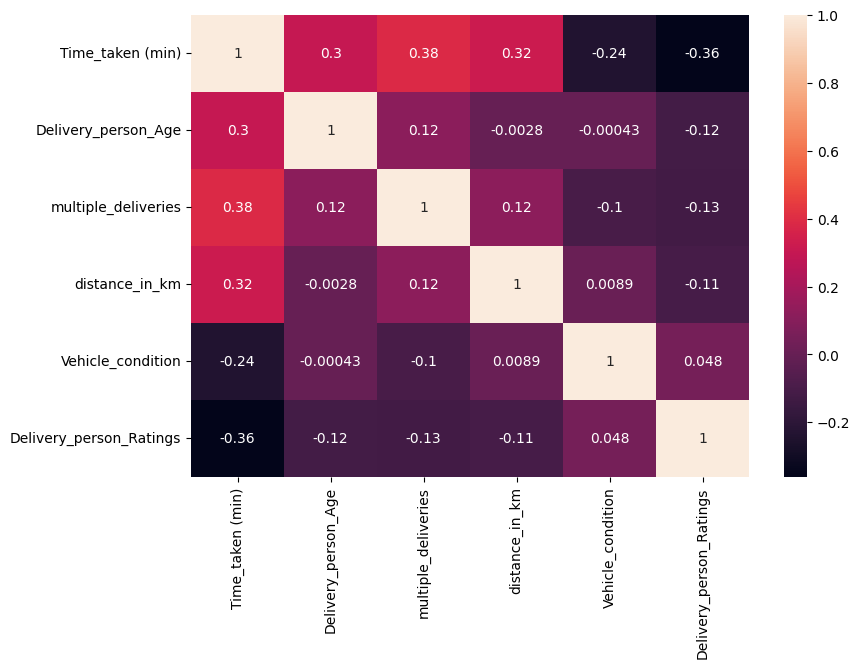

In [213]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
sns.heatmap(df[["Time_taken (min)","Delivery_person_Age","multiple_deliveries","distance_in_km","Vehicle_condition","Delivery_person_Ratings"]].corr(),annot = True)
plt.show()

In [214]:
## multiple deliveries column is categorical in nature but it defined with numerical values.

## For this column we will use mode as imputation startergy

In [215]:
# Create SimpleImputer object with median strategy for most columns
numerical_imputer = SimpleImputer(strategy='median')

# Create SimpleImputer object with most frequent strategy for 'multiple_deliveries' column
multiple_deliveries_imputer = SimpleImputer(strategy='most_frequent')

In [216]:
# Define the numerical pipeline
numerical_pipeline = Pipeline(
    steps=[
        ('multiple_deliveries_imputer', multiple_deliveries_imputer),
        ('numerical_imputer', numerical_imputer),
        ('scaler', StandardScaler())
        ]
)

In [217]:
# Columns to be imputed with median strategy
columns_to_impute_median = ['Delivery_person_Age','Delivery_person_Ratings','distance_in_km']

# Columns to be imputed with most frequent strategy
columns_to_impute_most_frequent = ['multiple_deliveries']

In [218]:
city_categories = ["Urban","Semi-Urban","Metropolitian"]
festival_categories = ["No","Yes"]
vehicle_categories = ["motorcycle","scooter","electric_scooter"]
road_categories = ["Low","Medium","High","Jam"]
weather_categories = ["Sunny","Windy","Cloudy","Sandstorms","Stormy","Fog"]



In [219]:
cat_pipeline = Pipeline(

    steps = [
    ('imputer',SimpleImputer(strategy="most_frequent")),
    ("ordnialencoder",OrdinalEncoder(categories=[weather_categories,road_categories,vehicle_categories,festival_categories,city_categories])),
    ("scaler",StandardScaler())    

    ]
)

In [220]:
preprocessor = ColumnTransformer(
    transformers=[
    ('num_pipeline',numerical_pipeline,columns_to_impute_most_frequent+columns_to_impute_median),
    ('cat_pipeline',cat_pipeline,categorical_cols)
])

In [221]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((31320, 10), (13423, 10))

In [222]:
num_col = X_train.columns[X.dtypes != "object"]

In [223]:
X_train[num_col].corr()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,distance_in_km
Delivery_person_Age,1.000000,-0.113689,0.001098,0.117760,-0.008929
Delivery_person_Ratings,-0.113689,1.000000,0.047394,-0.125652,-0.106361
Vehicle_condition,0.001098,0.047394,1.000000,-0.096334,0.006536
multiple_deliveries,0.117760,-0.125652,-0.096334,1.000000,0.122712
distance_in_km,-0.008929,-0.106361,0.006536,0.122712,1.000000


In [224]:
preprocessor.fit_transform(X_train)

array([[-1.3278428 , -0.99632109, -0.45118314, ...,  2.35598922,
        -0.14070118, -1.8710506 ],
       [ 2.19313561,  0.72123752,  0.1921318 , ..., -0.77241127,
         7.10726093,  0.53730468],
       [-1.3278428 , -0.99632109, -0.12952567, ...,  0.79178897,
        -0.14070118,  0.53730468],
       ...,
       [ 0.4326464 , -0.65280937, -0.12952567, ..., -0.77241127,
        -0.14070118,  0.53730468],
       [-1.3278428 ,  1.06474924,  0.1921318 , ...,  0.79178897,
        -0.14070118,  0.53730468],
       [ 3.95362481, -0.65280937,  0.1921318 , ..., -0.77241127,
        -0.14070118,  0.53730468]])

In [225]:
pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())

,num_pipeline__multiple_deliveries,num_pipeline__Delivery_person_Age,num_pipeline__Delivery_person_Ratings,num_pipeline__distance_in_km,cat_pipeline__Weather_conditions,cat_pipeline__Road_traffic_density,cat_pipeline__Type_of_vehicle,cat_pipeline__Festival,cat_pipeline__City
0,-1.327843,-0.996321,-0.451183,1.723472,0.276150,-1.112620,2.355989,-0.140701,-1.871051
1,2.193136,0.721238,0.192132,1.576326,1.449136,1.295844,-0.772411,7.107261,0.537305
2,-1.327843,-0.996321,-0.129526,-1.536585,-0.896836,-1.112620,0.791789,-0.140701,0.537305
3,-1.327843,-0.824565,0.835447,-0.989664,-1.483329,-1.112620,-0.772411,-0.140701,0.537305
4,-1.327843,-1.339833,-0.451183,-0.194244,-1.483329,1.295844,-0.772411,-0.140701,0.537305
...,...,...,...,...,...,...,...,...,...
31315,0.432646,1.236505,-0.129526,-0.175598,-0.310343,1.295844,2.355989,-0.140701,0.537305
31316,0.432646,-1.339833,0.835447,1.576182,-0.896836,-1.112620,-0.772411,-0.140701,0.537305
31317,0.432646,-0.652809,-0.129526,-0.730680,0.862643,0.493022,-0.772411,-0.140701,0.537305
31318,-1.327843,1.064749,0.192132,1.100209,0.276150,-0.309799,0.791789,-0.140701,0.537305


In [230]:
X_dum = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())

In [232]:
X_dum['cat_pipeline__City'].isnull().sum()

0

In [233]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [234]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [235]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [236]:
regression.coef_

array([[ 1.93983967,  2.13760657, -2.34500388,  1.59062588,  1.32004081,
         2.93248416, -1.17513806,  1.54168344,  0.87709952]])

In [237]:
regression.intercept_

array([26.35878033])

In [238]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [240]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [242]:
models = {

    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "ElasticNet" : ElasticNet(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "SVR" : SVR(kernel="rbf", gamma = "auto", C = 100)
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    #Make predications
    y_pred = model.predict(X_test)

    mae,rmse,r2_square = evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    

    print('Model Training Performance')
    print("RMSE: ", rmse )
    print("MAE: ",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)

    print("="*40)
    print('\n')

LinearRegression
Model Training Performance
RMSE:  6.5070830942196665
MAE:  5.155831087553844
R2 score 51.50115293821293


Lasso
Model Training Performance
RMSE:  6.96440776044737
MAE:  5.543437273285482
R2 score 44.44449614070825


Ridge
Model Training Performance
RMSE:  6.507081149609986
MAE:  5.155828802974746
R2 score 51.501181925490954


ElasticNet
Model Training Performance
RMSE:  6.992593860655938
MAE:  5.583634427934874
R2 score 43.9939016994422


DecisionTreeRegressor
Model Training Performance
RMSE:  6.3670910952625475
MAE:  4.801291315900569
R2 score 53.565493305151854




c:\ZOMATO TIME PREDICTION\venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR
Model Training Performance
RMSE:  5.399530984148555
MAE:  4.184693087361361
R2 score 66.60581994495772




In [243]:
model_list

['LinearRegression',
 'Lasso',
 'Ridge',
 'ElasticNet',
 'DecisionTreeRegressor',
 'SVR']